### Soft Assignment Intuition in Multivariate Gaussian

### **Part (a)**

In figure 2.23 , Bishop book shows a mixture of 3 bi-variate gaussian distrubtion and their contours. 

I will also take only 3 Bi-variate gaussian distribution 

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

**Fixed variables**

In [3]:
N = 500 
xlist = np.linspace(-4, 4, N)
ylist = np.linspace(-4, 4, N)
X, Y = np.meshgrid(xlist, ylist)

**Generate 3 different multivariate gaussian distriubtion**

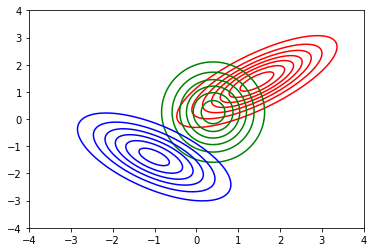

In [4]:
#Distribution 1 

mu_1 = [1+np.random.rand(1)[0] for i in range(2)]
cov_1 =[ [0.9,0.6],[0.6,0.7] ]  # cov(X1,X2) = 0.6 i.e. positively correlated 
f_1 = multivariate_normal(mu_1,cov_1)

#Evaluate density function f1 at each point of meshgrid
data1 = np.zeros(X.shape)
for i in range(data1.shape[0]): 
    for j in range(data1.shape[1]) : 
        data1[i,j] = f_1.pdf([X[i,j],Y[i,j]])

#Distribution 2 

mu_2 = [-0.5+ np.random.rand(1)[0] for i in range(2)]
cov_2 =[ [0.4,0.0],[0.0,0.9] ]  # cov(X1,X2) = 0.0 , not correlated 
f_2 = multivariate_normal(mu_2,cov_2)

#Evaluate density function f2 at each point of meshgrid
data2 = np.zeros(X.shape)
for i in range(data2.shape[0]): 
    for j in range(data2.shape[1]) : 
        data2[i,j] = f_2.pdf([X[i,j],Y[i,j]])


#Distribution 3 

mu_3 = [-1-np.random.rand(1)[0] for i in range(2)]
cov_3 =[ [0.9,-0.5],[-0.5,0.7] ]  # cov(X1,X2) = -0.5 i.e. negatively correlated 
f_3 = multivariate_normal(mu_3,cov_3)

#Evaluate density function f3 at each point of meshgrid
data3 = np.zeros(X.shape)
for i in range(data3.shape[0]): 
    for j in range(data3.shape[1]) : 
        data3[i,j] = f_3.pdf([X[i,j],Y[i,j]])
        
plt.contour(X,Y,data1,colors=['red'])
plt.contour(X,Y,data2,colors=['green'])
plt.contour(X,Y,data3,colors=['blue'])
plt.show()

**Mixture of Multivariate Gaussians** <br>

   f(x) = π1*f1(x) + π2*f2(x) + π3*f3(x) 

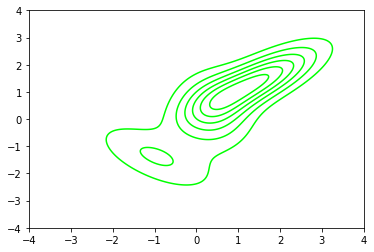

In [5]:
# let's take π1 = 0.4, π2 = 0.3, π3 = 0.3

π1, π2, π3 = 0.5, 0.3, 0.2
data = π1*data1 + π2*data2 + π3*data3 
plt.contour(X,Y,data,colors='lime')
plt.show()

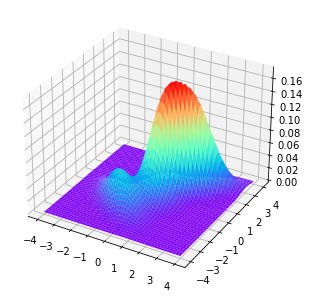

In [6]:
# Surface Plot of mixture model

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(X,Y,data,cmap='rainbow')
plt.show()

### Part (b)

In [7]:
N = 500
F = [f_1,f_2,f_3]
X_F = np.zeros((N,2))
Z_F = []
for i in range(N): 
    j = np.random.choice([0,1,2], p=[π1, π2, π3])
    X_F[i,:] = F[j].rvs(size=1)  # randomly select point X = (x1,x2) from distribution f_j 
    Z_F.append(j)  # latent variable 

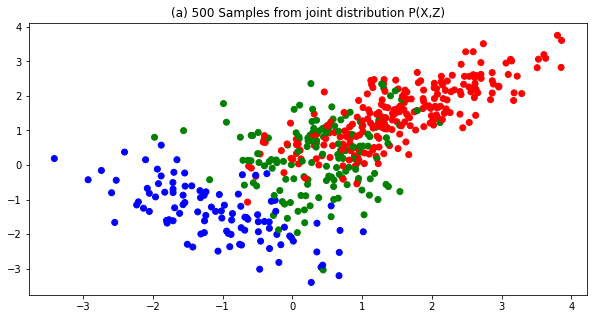

In [8]:
plt.figure(figsize=(10,5))
colors = ['red','green','blue']
plt.scatter(X_F[:,0],X_F[:,1],c = [colors[Z_F[i]] for i in range(N)])
plt.title('(a) 500 Samples from joint distribution P(X,Z)')
plt.show()

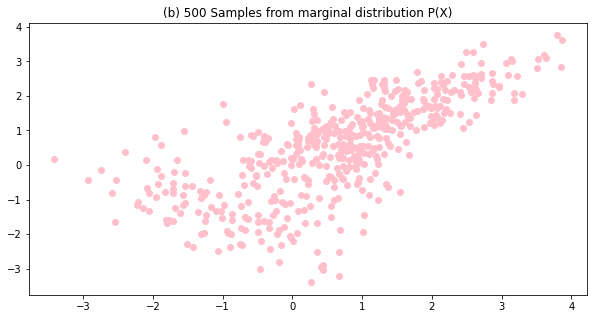

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X_F[:,0],X_F[:,1], c='pink')
plt.title('(b) 500 Samples from marginal distribution P(X)')
plt.show()

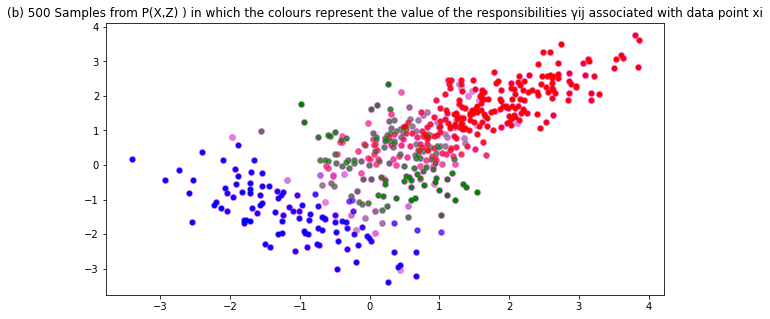

In [11]:
π = [π1, π2, π3]
colors = ['red','green','blue']
plt.figure(figsize=(10,5))
plt.scatter(X_F[:,0],X_F[:,1], c='violet')
plt.title('(b) 500 Samples from P(X,Z) ) in which the colours represent the value of the responsibilities γij associated with data point xi')
for i in range(N): 
    j = Z_F[i]
    γ_ij = π[j]*F[j].pdf([X_F[i,0],X_F[i,1]])/sum([ π[p]*F[p].pdf([X_F[i,0],X_F[i,1]]) for p in range(3)])
    plt.scatter([X_F[i,0]],[X_F[i,1]],c = colors[j], alpha=γ_ij, s=20)
plt.show()